## Apply Data Augmentation
Data augmentation is a technique that generates new training samples by applying random transformations to the existing samples, such as rotations, flips, or zooms.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    './dataset/seg_train/seg_train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse'
)
test_generator = test_datagen.flow_from_directory(
    './dataset/seg_test/seg_test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse'
)

Found 5192 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


### Showing some sample data and validating the dataset

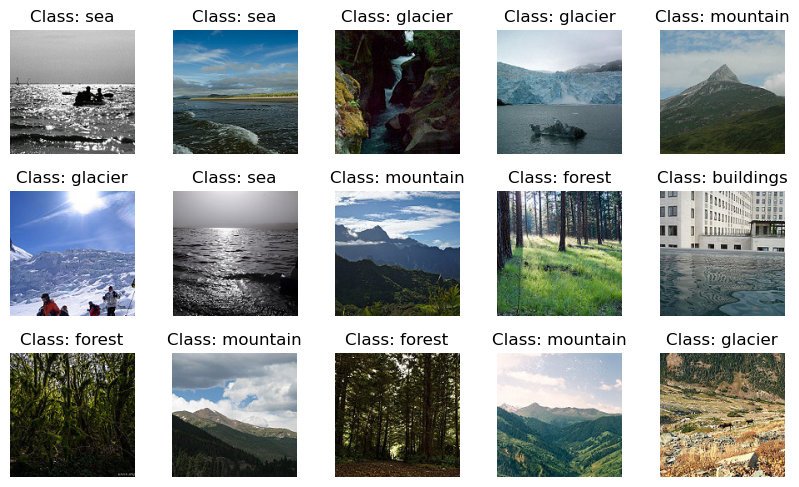

In [3]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea']


samples = train_generator.__next__() 
images = samples[0]
target = samples[1]

plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')